## Import Modules

In [24]:
from fbprophet import Prophet
import pandas as pd

## Initiate Model

In [3]:
model = Prophet(changepoint_prior_scale=0.01)

## Read Data

In [4]:
df = pd.read_csv('model_ready_ts.csv')

In [5]:
df.head()

,Unnamed: 0,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,0,7224.17,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,1,7141.92,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,2,7121.93,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,3,7066.64,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,4,6937.04,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:15:00


In [6]:
df.drop(columns= 'Unnamed: 0')

,Haryana Load (MW),month,weekday,temp,dew,humidity,windspeed,winddir,visibility,cloudcover,year,day,Date
0,7224.17,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:15:00
1,7141.92,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:30:00
2,7121.93,10,5,30.0,24.0,70.29,0.0,0.0,2.0,27.4,2016,1,2016-10-01 00:45:00
3,7066.64,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:00:00
4,6937.04,10,5,30.0,24.0,70.29,0.0,0.0,2.0,0.0,2016,1,2016-10-01 01:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224632,8537.11,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:00:00
224633,8554.19,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:15:00
224634,8536.29,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:30:00
224635,8510.32,9,3,29.0,26.8,87.64,7.8,82.0,2.6,70.3,2021,9,2021-09-09 23:45:00


## Multivariate Forecasting

In [7]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir']]

In [8]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0.0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0.0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0.0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0.0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
224632,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82.0
224633,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82.0
224634,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82.0
224635,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82.0


In [9]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
0,2016-10-01 00:15:00,7224.17,30.0,24.0,70.29,27.4,0.0,0.0
1,2016-10-01 00:30:00,7141.92,30.0,24.0,70.29,27.4,0.0,0.0
2,2016-10-01 00:45:00,7121.93,30.0,24.0,70.29,27.4,0.0,0.0
3,2016-10-01 01:00:00,7066.64,30.0,24.0,70.29,0.0,0.0,0.0
4,2016-10-01 01:15:00,6937.04,30.0,24.0,70.29,0.0,0.0,0.0


In [10]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir
224632,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82.0
224633,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82.0
224634,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82.0
224635,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82.0
224636,2021-09-09 00:00:00,8430.02,28.0,26.0,88.92,50.0,9.4,100.0


In [11]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [12]:
mv_model = Prophet()

In [13]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')

## Now add Train-Test Split

In [14]:
train_size = int(dfmv.shape[0]*0.7)

In [16]:
df_train = dfmv.iloc[:train_size]

In [20]:
# test_size = dfuv.shape[0] - train_size

In [18]:
df_test = dfmv[train_size:]

## Fit model on Train Dataset

In [19]:
model.fit(df_train)

## Save model

In [20]:
import pickle

In [21]:
import joblib

In [22]:
# joblib.dump(model, 'saved_mv_model.pkl')

['saved_mv_model.pkl']

In [23]:
# saved_mv_model = joblib.load('saved_mv_model.pkl')

In [28]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
157245,2019-08-20 22:45:00,8445.34,30.0,24.0,70.29,37.1,9.4,310.0
157246,2019-08-20 23:00:00,8377.34,29.0,24.8,78.18,34.2,5.3,266.0
157247,2019-08-20 23:15:00,8212.44,29.0,24.8,78.18,34.2,5.3,266.0
157248,2019-08-20 23:30:00,8100.34,29.0,24.8,78.18,34.2,5.3,266.0
157249,2019-08-20 23:45:00,7995.15,29.0,24.8,78.18,34.2,5.3,266.0
...,...,...,...,...,...,...,...,...
224632,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82.0
224633,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82.0
224634,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82.0
224635,2021-09-09 23:45:00,8510.32,29.0,26.8,87.64,70.3,7.8,82.0


In [36]:
test_ds = df_test.drop(columns='y')

In [37]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir
157245,2019-08-20 22:45:00,30.0,24.0,70.29,37.1,9.4,310.0
157246,2019-08-20 23:00:00,29.0,24.8,78.18,34.2,5.3,266.0
157247,2019-08-20 23:15:00,29.0,24.8,78.18,34.2,5.3,266.0
157248,2019-08-20 23:30:00,29.0,24.8,78.18,34.2,5.3,266.0
157249,2019-08-20 23:45:00,29.0,24.8,78.18,34.2,5.3,266.0
...,...,...,...,...,...,...,...
224632,2021-09-09 23:00:00,29.0,26.8,87.64,70.3,7.8,82.0
224633,2021-09-09 23:15:00,29.0,26.8,87.64,70.3,7.8,82.0
224634,2021-09-09 23:30:00,29.0,26.8,87.64,70.3,7.8,82.0
224635,2021-09-09 23:45:00,29.0,26.8,87.64,70.3,7.8,82.0


In [25]:
# test_ds = pd.DataFrame(df_test['ds'])

In [38]:
# test_ds

## Make Forecast on Test Dataset

In [39]:
forecast = saved_mv_model.predict(test_ds)

In [40]:
test_forecast = forecast

In [41]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-03 00:00:00,6076.078360,6730.361074,9166.967426,6076.078360,6076.078360,1898.514269,1898.514269,1898.514269,-64.484923,...,105.038283,105.038283,105.038283,1857.960909,1857.960909,1857.960909,0.0,0.0,0.0,7974.592629
1,2019-08-03 00:15:00,6076.077249,6691.101166,9095.071226,6076.077249,6076.077249,1849.693805,1849.693805,1849.693805,-113.320589,...,105.175974,105.175974,105.175974,1857.838420,1857.838420,1857.838420,0.0,0.0,0.0,7925.771055
2,2019-08-03 00:30:00,6076.076139,6704.195917,9156.903517,6076.076139,6076.076139,1806.897266,1806.897266,1806.897266,-156.104443,...,105.285680,105.285680,105.285680,1857.716029,1857.716029,1857.716029,0.0,0.0,0.0,7882.973405
3,2019-08-03 00:45:00,6076.075029,6646.012901,9043.677782,6076.075029,6076.075029,1770.211168,1770.211168,1770.211168,-192.749038,...,105.366471,105.366471,105.366471,1857.593735,1857.593735,1857.593735,0.0,0.0,0.0,7846.286197
4,2019-08-03 02:00:00,6076.069479,6467.534848,9090.320045,6076.069479,6076.069479,1675.875508,1675.875508,1675.875508,-286.412790,...,105.304575,105.304575,105.304575,1856.983723,1856.983723,1856.983723,0.0,0.0,0.0,7751.944987


In [42]:
test_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67387,2021-12-31 22:45:00,5982.091318,-3573.150240,14329.240291,-2796.488541,15005.759033,-620.460033,-620.460033,-620.460033,254.877259,...,103.962738,103.962738,103.962738,-979.300030,-979.300030,-979.300030,0.0,0.0,0.0,5361.631285
67388,2021-12-31 23:00:00,5982.090208,-3698.055252,14370.462918,-2796.644003,15005.998403,-691.429457,-691.429457,-691.429457,183.614230,...,104.226333,104.226333,104.226333,-979.270020,-979.270020,-979.270020,0.0,0.0,0.0,5290.660751
67389,2021-12-31 23:15:00,5982.089098,-3573.977317,14562.957025,-2796.799465,15006.237773,-759.775555,-759.775555,-759.775555,114.998145,...,104.466624,104.466624,104.466624,-979.240324,-979.240324,-979.240324,0.0,0.0,0.0,5222.313543
67390,2021-12-31 23:30:00,5982.087988,-3740.229166,14427.549288,-2796.954927,15006.477143,-824.315507,-824.315507,-824.315507,50.212765,...,104.682671,104.682671,104.682671,-979.210943,-979.210943,-979.210943,0.0,0.0,0.0,5157.772480
67391,2021-12-31 23:45:00,5982.086878,-4016.912363,14375.773770,-2797.110390,15006.716513,-884.140665,-884.140665,-884.140665,-9.832324,...,104.873537,104.873537,104.873537,-979.181878,-979.181878,-979.181878,0.0,0.0,0.0,5097.946213


In [43]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-03 00:00:00,7974.592629,6730.361074,9166.967426
1,2019-08-03 00:15:00,7925.771055,6691.101166,9095.071226
2,2019-08-03 00:30:00,7882.973405,6704.195917,9156.903517
3,2019-08-03 00:45:00,7846.286197,6646.012901,9043.677782
4,2019-08-03 02:00:00,7751.944987,6467.534848,9090.320045
...,...,...,...,...
67387,2021-12-31 22:45:00,5361.631285,-3573.150240,14329.240291
67388,2021-12-31 23:00:00,5290.660751,-3698.055252,14370.462918
67389,2021-12-31 23:15:00,5222.313543,-3573.977317,14562.957025
67390,2021-12-31 23:30:00,5157.772480,-3740.229166,14427.549288


## Plot test forecast with actual values

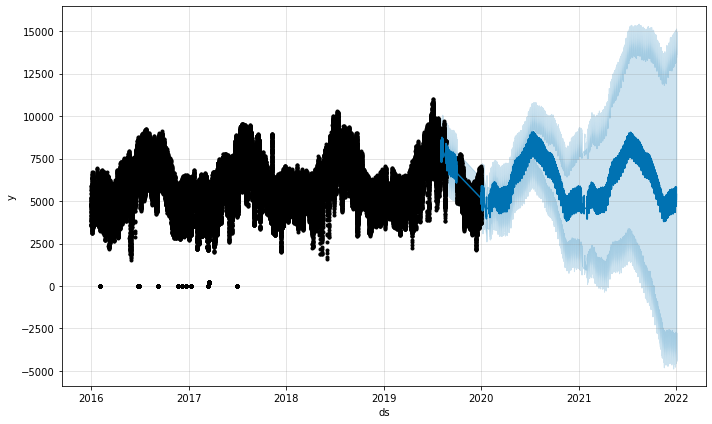

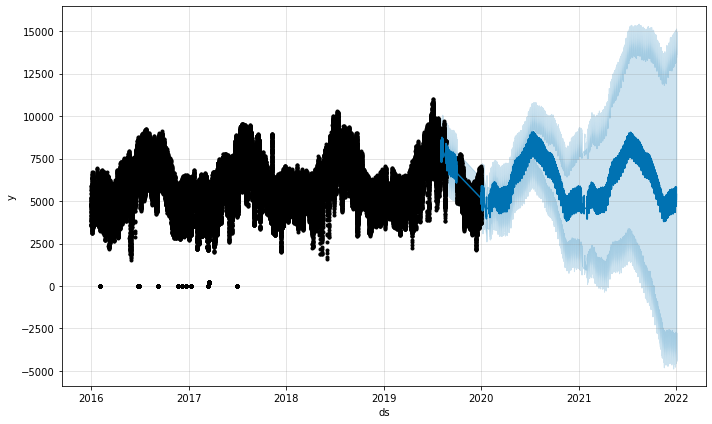

In [44]:
saved_mv_model.plot(test_forecast)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

(0.0, 12000.0)

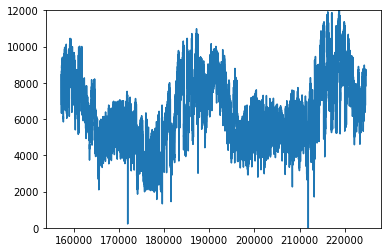

In [46]:
plt.plot(df_test['y'])
plt.ylim([0, 12000])

## Create future Dataframes

In [47]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [48]:
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:15:00
2,2016-01-01 00:30:00
3,2016-01-01 00:45:00
4,2016-01-01 01:00:00


## Make future forecast

In [49]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125127,2020-01-20 19:45:00,5168.358648,3817.604305,6427.854630
125128,2020-01-20 20:45:00,5230.380541,4105.404309,6518.917113
125129,2020-01-20 21:45:00,5074.069517,3867.958035,6337.513628
125130,2020-01-20 22:45:00,4810.340248,3615.946853,6066.842982
125131,2020-01-20 23:45:00,4560.129886,3351.641586,5791.330540


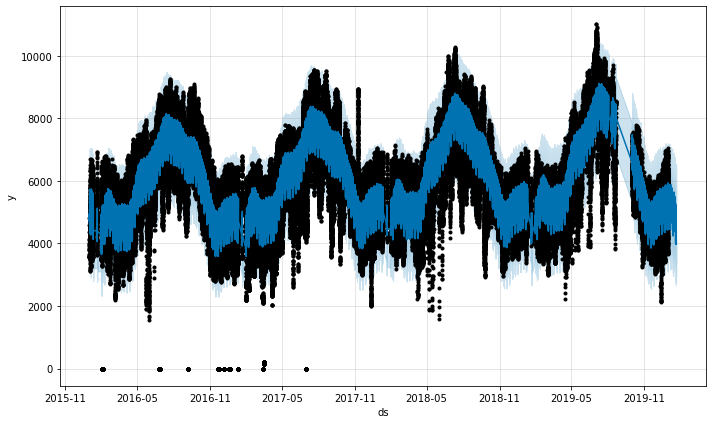

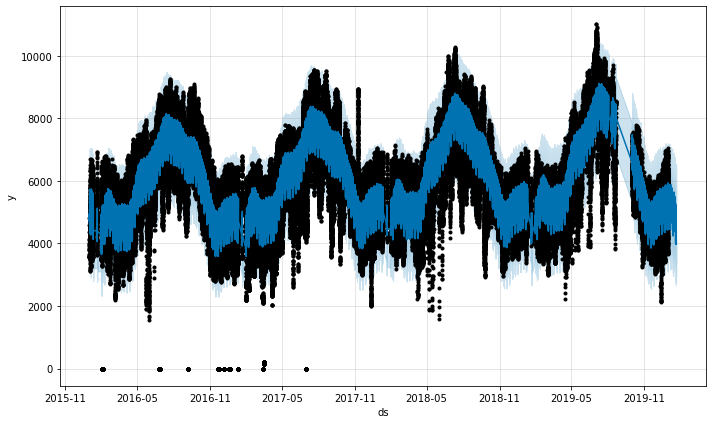

In [50]:
saved_mv_model.plot(forecast)